**Note:** the CSV file, "data.csv", will be automatically downloaded & renamed, **so no need to upload**</br>
 
*   The end result of the exploratory analysis would be 3 basic but informative graphs of the data at hand
*   this notebook is created to **demonstrate** how easy it is to tell a story using the data and</br>convey how fun working with data really is 😸🙌
*   This is also a good example to understand why cleaning data is important and go over common "noise" that is seen in data</br>and how it is dealt with using python and accumilating insight over the existing data
*   after running all the cells, refresh the file directory to find the saved png files of the 3 charts.






In [ ]:
# install wget to quickly download data source
!python3 -m pip install --no-cache-dir -U wget --prefer-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b7310b95df3b7390449f9b33e201079dc43827d8fcef750c53d69de7e0d5a4ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-lqf4w_5v/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Importing external libraries to help analysing the data

In [ ]:
import pandas as pd
from collections import Counter
# from IPython.display import display
  # already exists by default ^
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from pprint import pprint
import nltk
import numpy as np
import seaborn as sns
import re
figure(figsize=(8, 6), dpi=120)

<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

In [ ]:
# run if "data.csv" is not uploaded, to download it. | will not overwrite
import wget
import pathlib
URL = "http://172.105.125.123/data.csv"
if not (pathlib.Path(str(pathlib.Path().absolute())+"/data.csv").is_file()):
  wget.download(URL, "data.csv")

Importing the CSV data into python

In [ ]:
# alternative / debug script for importing (DO NOT use unless issue with importing)
import pathlib
path = str(pathlib.Path().absolute())
table = pd.read_csv(path + "/data.csv", 
                    dtype=None, 
                    na_filter=False, 
                    skip_blank_lines=True, 
                    encoding="utf-8",
                    # on_bad_lines=None,
                    warn_bad_lines=True,
                    lineterminator=None) 
display(table)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,title,author,isbn,year_of_publication,publisher,language,number_of_pages,genre
0,,toxic parents,Dr susan forward,5328434,1989,bantom books,english,324,non-fiction
1,,the last straw,Jeff kinney,9780141324920,2009,puffin books,english,217,
2,,Harry potter and the Half blood prince,J.K Rowling,978140889476,2005,Bloomsbury publishing,english,541,Fantasy
3,,miles to go,miley cyrus,978140762612,2010,,english,282,biography
4,,dork diaries,rachell renee russel,9781471122774,2014,childrens publishing division,english,295,fiction
5,,Nancy Drew and the secret in the stars,Carolyn Keene,0-611-042637,2000,Alladin Paper Books,English,147,Mystery
6,,Harry Potter and the Philosopher's Stone,J.K Roling,978-1-40889462-0,2013,Bloomsburry,English,332,Fantasy
7,,How to catch a Frog,Heather Ross,978-1-617690983,2014,Abrams,English,238,Fiction
8,,The curious incident of the Dog in the Night Time,Mark Haddon,978-0-099-45025-2,2003,Vintage Books,English,265,Mystery
9,,Anne Frank - Beyond the Diary,Ruud Van Der Rol & Reinverhoeven,0-590-47447-2,1992,Scholastic Inc,English,105,Non -Fiction


In [ ]:
# Reading the CSV file into Python and assigning it to the variable 'table'
table = pd.read_csv('data.csv')

<h3>PRE-EXPLORATORY DATA CLEANING & IMPUTING - 'genre'</h3>
a section of the data, "genre" is cleaned using a regex here

In [ ]:
# Let's see what we have so far under genre
table.genre.value_counts()

Fantasy          4
Mystery          2
Non -Fiction     2
non-fiction      1
biography        1
fiction          1
Fiction          1
fantasy          1
Name: genre, dtype: int64

there seems to be different variations of the same word here, lets quickly fix that
to keep data consistent for the coming parts of the analysis

In [ ]:
# lets normalize the casing and strip spacing of the genres first and update the CSV file
table['genre'] = table['genre'].str.upper()
print("Casing Normalization"); display(table.genre.value_counts())

table['genre'] = table['genre'].str.strip()
print("\nSpacing Normlization"); table.genre.value_counts()

# notice how this tranformation affect the genre "fiction / Fiction"

Casing Normalization


FANTASY          4
FICTION          2
MYSTERY          2
NON -FICTION     2
NON-FICTION      1
BIOGRAPHY        1
FANTASY          1
Name: genre, dtype: int64


Spacing Normlization


FANTASY         5
FICTION         2
MYSTERY         2
NON -FICTION    2
NON-FICTION     1
BIOGRAPHY       1
Name: genre, dtype: int64

In [ ]:
# imputing / replacing format of Non-Fiction
match_non_fiction = re.compile(r"^[Nn][Oo].*[Ff][Ii][Cc][Tt]")
table['genre'] = table['genre'].apply(
    lambda x: "NON-FICTION" if match_non_fiction.search(str(x)) != None else str(x))
table['genre'] = table['genre'].str.title()
table.genre.value_counts()

Fantasy        5
Non-Fiction    3
Fiction        2
Mystery        2
Nan            1
Biography      1
Name: genre, dtype: int64

<h3>PRE-EXPLORATORY DATA CLEANING & IMPUTING - 'language'</h3>
a section of the data, "language" is cleaned here removing any inconsistencies with the spelling

In [ ]:
# let's see what the language column contains now
table.language.value_counts()

English     7
english     4
english     1
dhivehi     1
englisg     1
Name: language, dtype: int64

In [ ]:
# a casing normalisation is not needed here, as a regex function will take care of it
# instead trailing whitespaces are removes with strip
table['language'] = table['language'].str.strip()
table.language.value_counts()

English    7
english    5
dhivehi    1
englisg    1
Name: language, dtype: int64

In [ ]:
# a simple regex filter will remove spelling errors and capitalisation
pattern_en = re.compile(r"[Ee][Nn]")
pattern_dh = re.compile(r"[Dd]([Hh]|[Ii])")

table['language'] = table['language'].apply(
    lambda x: "English" if pattern_en.search(str(x)) != None else x)
table['language'] = table['language'].apply(
    lambda x: "Dhivehi" if pattern_dh.search(str(x)) != None else x)
table.language.value_counts()

English    13
Dhivehi     1
Name: language, dtype: int64

<h3>DATA EXPLORATION</h3>
Univariate Analysis of "title" (Nominal Data)

In [ ]:
# grabbing just the titles from the table and assigning it to the variable 'titles'
titles = table['title']
display(titles)

# number of records of titles
print(f"Number Of Records: {len(titles)}") 

0                                         toxic parents
1                                       the last straw 
2                Harry potter and the Half blood prince
3                                           miles to go
4                                          dork diaries
5                Nancy Drew and the secret in the stars
6              Harry Potter and the Philosopher's Stone
7                                  How to catch a Frog 
8     The curious incident of the Dog in the Night Time
9                        Anne Frank  - Beyond the Diary
10                                       kuru vaahakah 
11                                      the law killers
12                                  The bane chronicles
13                                        City of Glass
Name: title, dtype: object

Number Of Records: 14


In [ ]:
# Count the frequency of words in all of the titles
title_counter = Counter()
for eachTitle in titles:
  title_counter.update(eachTitle.split(" "))

In [ ]:
# Display the top 10 Most Frequent words in all of the titles
# pprint used by default in notebook but, its very handy to print lists in a more readable format
from pprint import pprint
pprint(title_counter.most_common(10))

[('the', 9),
 ('', 4),
 ('and', 3),
 ('Harry', 2),
 ('to', 2),
 ('in', 2),
 ('The', 2),
 ('of', 2),
 ('toxic', 1),
 ('parents', 1)]


In [ ]:
# create a list for Words and WordCount
words = []
word_count = []
# separate the pair of tuples of each Word and their Count into the list
  # in descending order
for eachPair in reversed(title_counter.most_common(15)):
    word, count = eachPair[0], eachPair[1]
    words.append(word)
    word_count.append(count)

In [ ]:
# pretty print out the list of Words and their respective Counts (desecnding)
pprint(words)
pprint(word_count)

['blood',
 'Half',
 'potter',
 'straw',
 'last',
 'parents',
 'toxic',
 'of',
 'The',
 'in',
 'to',
 'Harry',
 'and',
 '',
 'the']
[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 9]


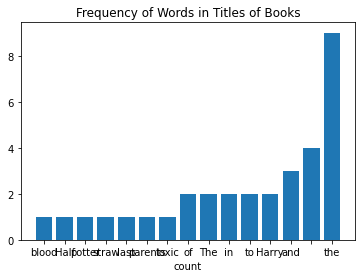

In [ ]:
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
# plot a bar chart illustrating the frequency of the top 15 most common words in increasing order (histogram)
plt.bar(words, word_count, label="titleWordCountHistogram")
# give the chart a heading and some useful labels
plt.title("Frequency of Words in Titles of Books")
plt.xlabel("count")
plt.show()

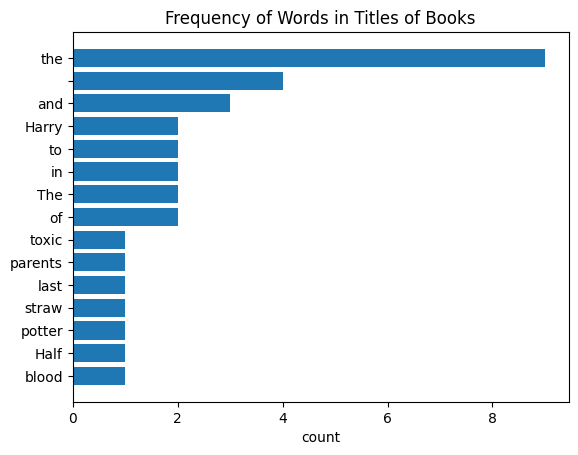

In [ ]:
# flip the chart so all the labels on the bottom would fit better
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.barh(words, word_count, label="titleWordCountHistogram")
plt.title("Frequency of Words in Titles of Books")
plt.xlabel("count")
plt.show()

<h3>DATA NORMALIZATION AND CLEANING</h3>

In [ ]:
# Normalize the upper case and lower case of words to avoid confusion
  # example: "The" and "the"
print(len(title_counter))
pprint(title_counter)
title_counter_UPPER = Counter()
for eachTitle in title_counter:
  if eachTitle.upper() not in title_counter_UPPER:
    title_counter_UPPER[eachTitle.upper()] = title_counter[eachTitle]
  else:
    title_counter_UPPER[eachTitle.upper()] += title_counter[eachTitle]
print(len(title_counter_UPPER))
pprint(title_counter_UPPER)

49
Counter({'the': 9,
         '': 4,
         'and': 3,
         'Harry': 2,
         'to': 2,
         'in': 2,
         'The': 2,
         'of': 2,
         'toxic': 1,
         'parents': 1,
         'last': 1,
         'straw': 1,
         'potter': 1,
         'Half': 1,
         'blood': 1,
         'prince': 1,
         'miles': 1,
         'go': 1,
         'dork': 1,
         'diaries': 1,
         'Nancy': 1,
         'Drew': 1,
         'secret': 1,
         'stars': 1,
         'Potter': 1,
         "Philosopher's": 1,
         'Stone': 1,
         'How': 1,
         'catch': 1,
         'a': 1,
         'Frog': 1,
         'curious': 1,
         'incident': 1,
         'Dog': 1,
         'Night': 1,
         'Time': 1,
         'Anne': 1,
         'Frank': 1,
         '-': 1,
         'Beyond': 1,
         'Diary': 1,
         'kuru': 1,
         'vaahakah': 1,
         'law': 1,
         'killers': 1,
         'bane': 1,
         'chronicles': 1,
         'City': 1,
    

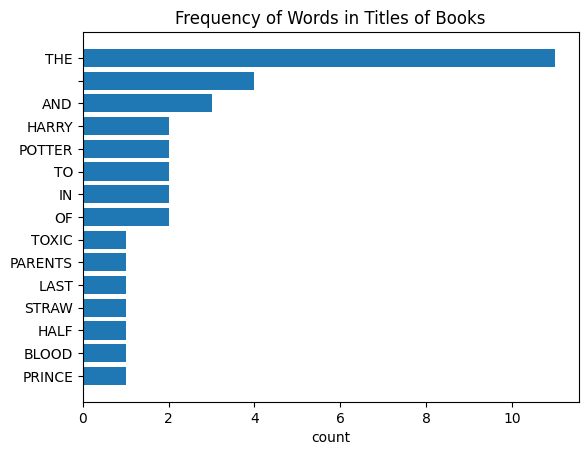

In [ ]:
# plot the new graph to visualise the changes
words = []
word_count = []
# separate the pair of tuples of each Word and their Count into the list
  # in descending order
for eachPair in reversed(title_counter_UPPER.most_common(15)):
    word, count = eachPair[0], eachPair[1]
    words.append(word)
    word_count.append(count)

plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.barh(words, word_count, label="titleWordCountHistogram_UPPER")
plt.title("Frequency of Words in Titles of Books")
plt.xlabel("count")
plt.show()

In [ ]:
# Cleaning the data Further by removing words which provide no meaning
# these words are usually called stop words
# they include prepositions, articles, punctuations etc
  # for example, "a", "the", "it", etc.

nltk.download('stopwords')
from nltk.corpus import stopwords
# using existing stop word vocabulary
stop_words = set(stopwords.words("english"))
print(stop_words)

{"don't", 'most', 'the', "aren't", 'why', 'shouldn', 'and', 'did', 'such', 'against', 'weren', 're', 'a', 'before', 'they', 'more', 'm', "mustn't", 'by', 'he', "that'll", 'their', 'at', 'was', 'to', "shan't", 'few', 'himself', "needn't", 'for', 'just', "she's", 'again', 'this', 'ourselves', 'has', 'into', 'is', 'how', 'where', 'will', 's', 'she', 'couldn', 'doesn', 'does', 'yours', "haven't", "it's", "shouldn't", 'other', 'am', 'each', 't', "weren't", 'him', 'if', 'in', 've', 'of', 'very', 'off', 'aren', 'on', 'both', 'some', 'hasn', 'too', 'below', 'o', 'an', 'with', 'didn', 'up', 'myself', 'nor', 'd', 'mustn', 'them', 'my', 'mightn', 'from', 'here', "isn't", 'should', 'y', 'had', 'because', 'until', 'between', 'her', 'needn', 'about', 'ma', "you'd", 'yourselves', 'having', 'don', 'do', 'those', "doesn't", 'haven', "won't", 'further', 'his', 'shan', 'down', 'were', 'above', 'while', "couldn't", "you'll", "you're", 'over', 'not', 'can', 'through', 'doing', 'who', 'isn', 'your', 'so', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# removing the stopwords from the list of normalized titles
for eachWord in list(title_counter_UPPER):
  if eachWord.lower() in stop_words:
    print(f"{eachWord} : {title_counter_UPPER.pop(eachWord)}")
"...these words are removed"

THE : 11
AND : 3
TO : 2
IN : 2
HOW : 1
A : 1
OF : 2


'...these words are removed'

In [ ]:
# remove null between spaces
try:
  if title_counter_UPPER.get(""): # internal exception reverter | remove and try.
    print(f'"" : {title_counter_UPPER.pop("")}')
except KeyError as err:
  print(f'{err} : none remains')

"" : 4


['MILES', 'PRINCE', 'BLOOD', 'HALF', 'STRAW', 'LAST', 'PARENTS', 'TOXIC', 'POTTER', 'HARRY']
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2]


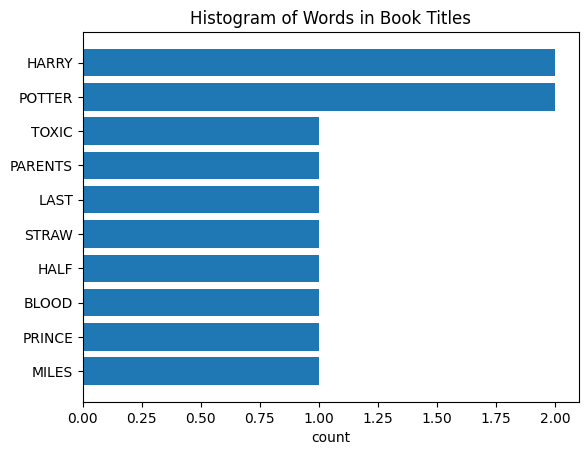

In [ ]:
# compiling the cleaned data into its final lists and plotting a new graph
  # to visualize the cleaned data
titles_cleaned = []
count_cleaned = []

for eachWord in reversed(Counter( # Ordered dictionary reversed
    dict( # Dict of T Pairs
        zip( # Transpose Pairs
            [title for title in title_counter_UPPER.keys()],
            [count for count in title_counter_UPPER.values()]
        ))).most_common(10)):

  title, count = eachWord[0], eachWord[1]
  titles_cleaned.append(title)
  count_cleaned.append(count)

print(titles_cleaned)
print(count_cleaned)

plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.barh(titles_cleaned, count_cleaned)
plt.title("Histogram of Words in Book Titles")
plt.xlabel("count")
plt.show()

<h3>DATA VISUALISATION</h3>

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 640x480 with 0 Axes>

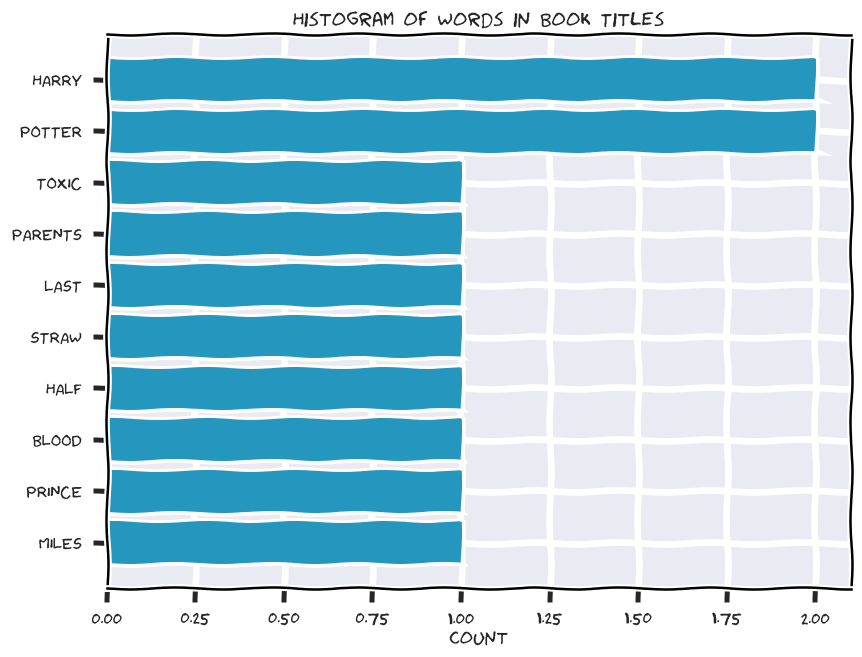

In [ ]:
# now that we have the structure of the visualisation we need, lets style it to make it prettier
print(plt.style.available)
  # ^ these are some premade styles in matplotlib library
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

figure(figsize=(8, 6), dpi=120)
plt.style.use("seaborn")
plt.xkcd()
plt.barh(titles_cleaned, count_cleaned, color="#2596be")
plt.title("Histogram of Words in Book Titles")
plt.grid(True)
plt.xlabel("count")
plt.savefig('Barchart-Titles.png')

plt.show()

<h3>DATA EXPLORATION</h3>
Sentiment Analysis of the title of the books
we are going to analyze the sentiment of the title of each book, weather they give a happy, negative or a neutral meaning, and try to understand the titles in another contextual dimension related to emotion. Then, we can append this new information to our existing table 😸

In [ ]:
# we are going to analyze the sentiment of the title of each book
# nltk provides a sentiment analyzer class, this is instantiated on SIA object.
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

# created a dictionary to keep track of levels of sentiment
sentiment = {"Positive": 0, "Neutral": 0, "Negative": 0}

sentimentTable = pd.DataFrame(columns=["title", "sentiment"])
sentimentTable.title = list(table["title"])

# a range iterator is used as it is easier to understand
    # while reading from and writing to the same list.    | remove traces

for i in range(0, len(list(table["title"])),1):
    result = SIA.polarity_scores(list(table["title"])[i])
    if result["compound"] < 0:
        sentiment["Negative"] += 1
        sentimentTable.at[i, "sentiment"] = "Negative"

    elif result["compound"] == 0:
        sentiment["Neutral"] += 1
        sentimentTable.at[i, "sentiment"] = "Neutral"

    else:
        sentiment["Positive"] += 1
        sentimentTable.at[i, "sentiment"] = "Positive"

# resulting reviewList is a fully populated 2 x 10254 -2D list of all sentiments.
print(sentiment)
print(type(sentiment))
# print("Total: {total}".format(total = sentiment["Positive"] + sentiment["Negative"] + sentiment["Neutral"]))
display(sentimentTable)


{'Positive': 1, 'Neutral': 11, 'Negative': 2}
<class 'dict'>


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,title,sentiment
0,toxic parents,Neutral
1,the last straw,Neutral
2,Harry potter and the Half blood prince,Neutral
3,miles to go,Neutral
4,dork diaries,Negative
5,Nancy Drew and the secret in the stars,Neutral
6,Harry Potter and the Philosopher's Stone,Neutral
7,How to catch a Frog,Neutral
8,The curious incident of the Dog in the Night Time,Positive
9,Anne Frank - Beyond the Diary,Neutral


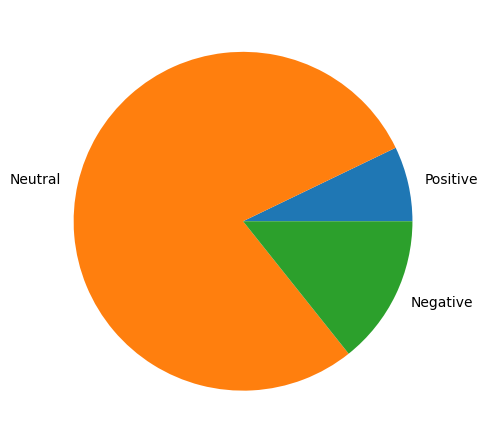

In [ ]:
# let's now visualize the data in a simple pie chart
sentimentType = []
sentimentCount = []

for key in sentiment:
  sentimentType.append(key)
  sentimentCount.append(sentiment[key])

plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.pie(sentimentCount, labels=sentimentType)
plt.show()

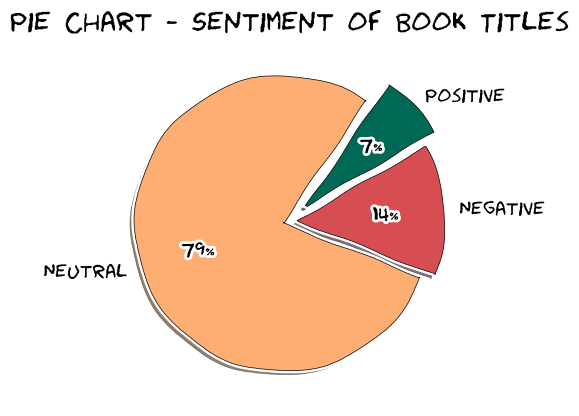

In [ ]:
# now now that we have the structure, lets stylize the chart
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use("fivethirtyeight")
plt.xkcd()

plt.pie(sentimentCount, labels=sentimentType,
        autopct='%1.f%%',
        colors=["#006955", "#FEAE73", "#D64E52"],
        explode=[0.15,0.05,0.05],
        wedgeprops={"edgecolor":"black"},
        shadow=True,
        startangle=30
        )
plt.title("Pie Chart - Sentiment of Book Titles")
# plt.tight_layout()
plt.savefig("PieChart-TitleSentiment.png")
plt.show()

DATA EXPLORATION

Univariate Analysis of "number_of_pages" (Continuous Numeric Data)

In [ ]:
# lets grab the number_of_pages column, for ease, it will be referred as pages column
pages = table['number_of_pages']
pprint(pages)

0     324
1     217
2     541
3     282
4     295
5     147
6     332
7     238
8     265
9     105
10    300
11    256
12    440
13    541
Name: number_of_pages, dtype: int64


In [ ]:
# statistical representation of the pages data column
statistics = pd.DataFrame(zip([
     "Mean",
     "Minimum",
     "Maximum",
     "Median",
     "Standard Deviation"
], [
    "{:.2f}".format(np.mean(pages)),
    "{:.2f}".format(np.amin(pages)),
    "{:.2f}".format(np.amax(pages)),
    "{:.2f}".format(np.median(pages)),
    "{:.2f}".format(np.std(pages))
              
]))

display(statistics)

,0,1
0,Mean,305.93
1,Minimum,105.00
2,Maximum,541.00
3,Median,288.50
4,Standard Deviation,123.21


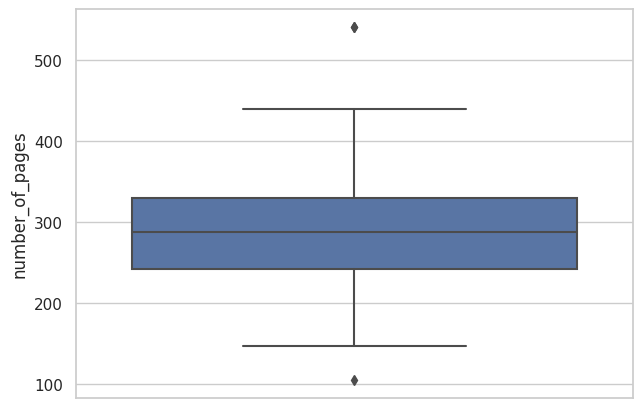

count     14.000000
mean     305.928571
std      127.866195
min      105.000000
25%      242.500000
50%      288.500000
75%      330.000000
max      541.000000
Name: number_of_pages, dtype: float64

In [ ]:
# Plotting a graph to understand the pages data further
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
# print(table.genre.describe())

sns.set_theme(style="whitegrid")
sns.boxplot(y=table.number_of_pages)
plt.show()

table.number_of_pages.describe()

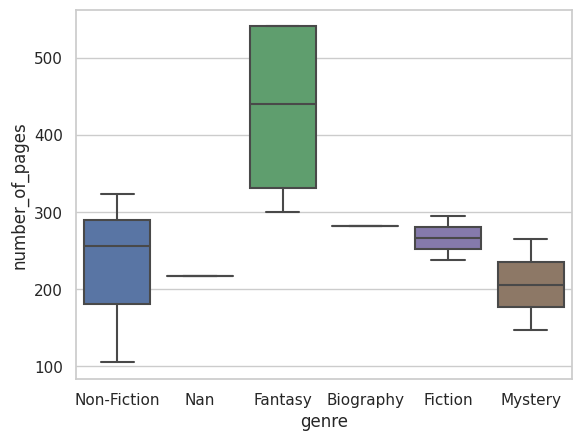

In [ ]:
# Adding an extran dimension "Genre" to get more insight about "number_of_pages"
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)
# print(table.genre.describe())

sns.set_theme(style="whitegrid")
sns.boxplot(y='number_of_pages', x='genre', data=table)
plt.show()

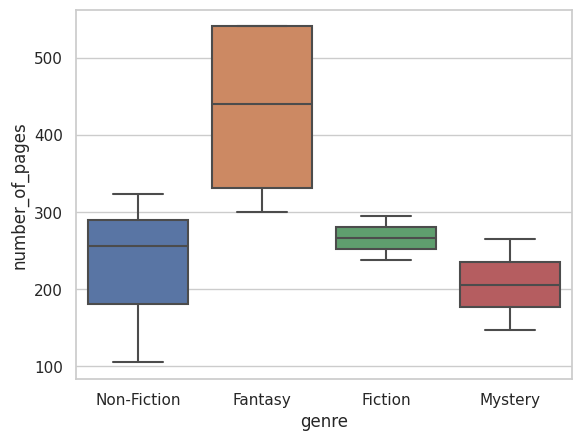

In [ ]:
#replot the table after dropping "Nan" and "Biography" : not enough values
table_genre = table[~table.genre.isin(["Nan", "Biography"])]

plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_theme(style="whitegrid")
sns.boxplot(y='number_of_pages', x='genre',
            #hue='language'
            data=table_genre)
plt.show()

# note: its possible add another dimension calles hues to illustrate how the 
# language the book is written in and its genre affects number of pages.
# however, this is not possible to plot with insufficient data, I will scrape
# NLibriary and add this in a few days.

**Note:** *the table value is kept seperate from other variations of it such as table_genre (some of which are views not duplicates to optimize for memory)
this is because a secondary goal of the analysis is to update the data using the cleaned and imputed
table at the end of exploratory analysis using the following code*

`table.to_csv("data_cleaned.csv")`
</br>
🤙

In [ ]:
# instead of using the language, lets add the dimension of older and newer books using the "year_of_publication" column
print(table_genre.year_of_publication.describe())

# cut off-value is 2009
table_book_age = pd.DataFrame(table_genre) # removes .LOC / view confliction | prefer view modificaiton / memory optimization
table_book_age['is_Modern_Book'] = table_genre['year_of_publication'] > 2007

table_book_age.is_Modern_Book.value_counts()

count      12.000000
mean     2005.583333
std         8.575423
min      1989.000000
25%      2002.250000
50%      2007.000000
75%      2013.250000
max      2015.000000
Name: year_of_publication, dtype: float64


False    6
True     6
Name: is_Modern_Book, dtype: int64

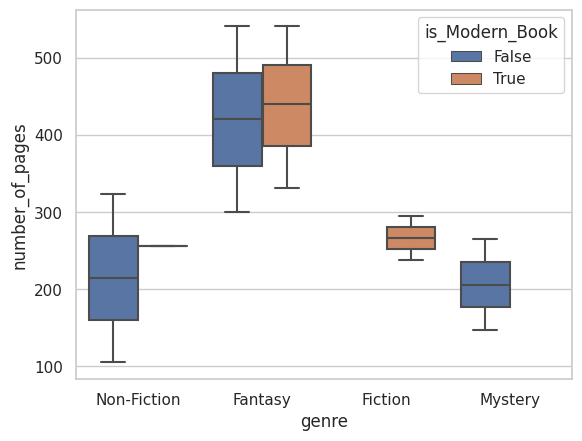

In [ ]:
# Lets intersect the new dimension of weather the book is modern on the existing graph
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_theme(style="whitegrid")
sns.boxplot(y='number_of_pages', x='genre',
            hue='is_Modern_Book',
            data=table_book_age)
plt.show()

<h3>VISUALISATION</h3>
we'll choose the most informative boxplots using the plots that covers what affects number_of_pages ths most

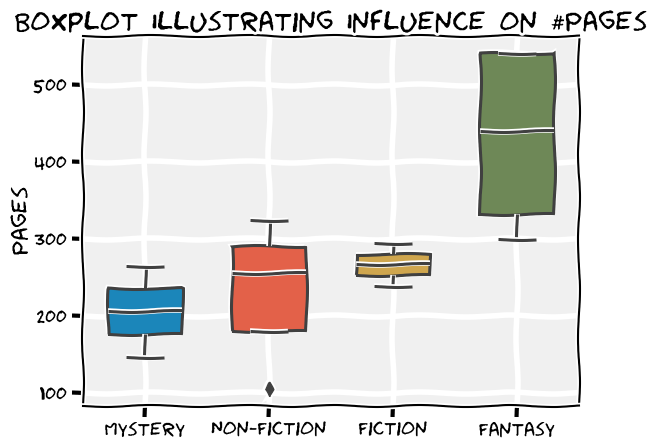

In [ ]:
# styling the visualisation, we will go with the pages x genre plot for now
plt.clf()
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use("fivethirtyeight")
plt.xkcd()

# sns.set_theme(style="whitegrid")
bxplt = sns.boxplot(
    y="number_of_pages", 
    x="genre", 
    order=["Mystery", "Non-Fiction", "Fiction", "Fantasy"],
    whis=0.5, #def: 1.5*IQR
    width=0.6,
    linewidth=2.2,
    fliersize=7,
    data=table_genre)

bxplt.set(
    title="Boxplot Illustrating Influence on #Pages",
    xlabel=None,
    ylabel="Pages"
    )

plt.grid(True)
plt.savefig('Boxplot-Pages.png')

plt.show()

### Predictive Data Analysis
So far, data has been cleaned and imputed, this is generally known as data-preprocessing, 
This can go on further depending on the end-goal of the data analysis at hand.
If the goal is to visualize the data, we can stop here.
But from here, we can move to predictive data analysis. This means building a model, using the data we have, the model will do some magic, and if you give it a random book, it can predict/make a guess about the genre, age, etc just from the title of the book to some degree of confidence. Meaning its not always correct.